# COGS 108 - Final Project


# Overview

Our project aims to analyze gun-availability, gun-violence, and gun regulation laws in the U.S. (State level). In our data analysis, we ran stats tests and models to observe and extrapolate the relationships between the variables (gun-availability, gun violence, gun regulation laws) and secondary confounding variables (political affiliation, crime rate, population, income) that may have an affect on the 3 main variables. Lastly, our data analysis suggests that there isn’t a significant relationship between gun-availability and gun-violence however gun regulation laws have a significant correlation with gun-violence.    

# Names

- Cesar Guajardo
- Zijian Bi
- Bruke Tamrat
- Trent Domanski

# Research Question

**General problem:**
- Why do some areas have more gun violence than others?

**Research Question:**
- What is the specific correlation between gun-availability and gun-violence per area, and do gun  regulation laws affect this correlation?

# Background and Prior Work

References (include links):

- Why is this question of interest to your group?

A: It’s an interest of ours since this is an important topic. Plus, there has been a lot of politics behind this subject matter.

- What background information led you to your hypothesis?

A: Given from source (2), more Americans die from gun-violence than in any other peer-nation of the developed world. This could be because there are more guns than people in the United States, based on the news article from the Washington Post (3). Also, the United States has one of the highest firearm-ownership rates in the world (4). Therefore, the more available Firearms, the more overall violence that can occur.

- Why is this important?

A: Gun-violence is a long standing issue in American society that is very prevalent today. Everytime there has been an event relating to mass gun-violence (i.e mass-shootings), this would receive significant coverage in the media, and individuals on both sides of the political spectrum can not seem to come to a firm agreement on how to halt these mass-violence events; then, there would be grid-lock within policy makers (especially in congress), which henders possibly valuable progress on life-saving regulations on firearms.

- What has already been done on this topic? What is already known?

A: There has been a lot of research done on this topic, however there can be biases with the research and how the data is represented between both left-wing and right-wing leaning groups, since left-wing groups tend to be more anti-gun and right-wing groups tend to be more pro-gun. However, most articles (that appear to be neutral) that we have read suggests that there is a positive correlation between firearm-availability and violent crime. We want to see if this is correct on our own accounts within available datasets within a totally unbiased view.

Sources:

1. https://www.rand.org/research/gun-policy/analysis/essays/firearm-prevalence-violent-crime.html.
2. https://lawcenter.giffords.org/facts/gun-violence-statistics/
3. https://www.washingtonpost.com/news/wonk/wp/2018/06/19/there-are-more-guns-than-people-in-the-united-states-according-to-a-new-study-of-global-firearm-ownership/
4. http://www.smallarmssurvey.org/fileadmin/docs/T-Briefing-Papers/SAS-BP-Civilian-Firearms-Numbers.pdf

# Hypothesis

**The more guns there are in an area, the more overall violence.** 

- Justification: Logically the more guns in an area the more opportunity there is for criminals to resort to gun violence.

**If gun regulations were to be tighter, then the less guns there would be, therefore less violence (coming back to our first hypothesis).** 

- Justification: If gun-regulation laws are tighter, then logically, there would be less firearms in circulation; therefore, less tools to commit overall violence.



# Datasets
- Datasets:
    1. GunAvailibility.txt
       - Source: https://lawcenter.giffords.org/scorecard/
       - Number of observations: 150
       - Descriptions: Dataset contains data with regards to each State’s Gun Law Strength Rank, Gun Death Rate Rank, and Gun Death Rate Actual. Dataset is combined with some of the other datasets for running statistical tests involving Gun Law Strength Rank, Gun Death Rate Actual and Gun Death Rate Rank

    2. PoliticalData.txt
         - Source: https://news.gallup.com/poll/226643/2017-party-affiliation-state.aspx  
         - Number of observations: 200
         - Descriptions: Dataset contains data with regards to each state’s Democratic and Republican distribution percentages, difference in % of Democrats and Republicans, and Political Lean, or how strong a state population’s political affiliation is towards Republican or Democrat. Dataset is combined with some of the other datasets for running statistical tests involving a state population’s Political Party preferences.  

    3. gunranks.txt
         - Source: https://dqydj.com/average-income-by-state-median-top-percentiles 
         - Number of observations: 50
         - Description: Dataset contains data with regards to the average yearly income in each state. Dataset is combined with some of the other datasets for running statistical tests involving Income

    4. incomedata.txt
         - Source: https://dqydj.com/average-income-by-state-median-top-percentiles/ 
         - Number of observations:50
         - Description: Dataset contains data with regards to the average yearly income in each state. Dataset is combined with some of the other datasets for running statistical tests involving Income

    5. gunAvailability.txt
         - Source: https://www.statista.com/statistics/215655/number-of-registered-weapons-in-the-us-by-state//
         - Number of observations: 50
         - Description: Dataset contains data with regards to the number of registered weapons in each state. Dataset is combined with some of the other datasets for running statistical tests involving Gun Availability. 
    6. crimeratedata.txt 
         - Source: https://www.statista.com/statistics/301549/us-crimes-committed-state/
         - Number of observations:50
         - Description: Dataset contains data with regards to the crime rate (Number of Crimes per 100,000 people) in each state in 2018. Dataset is combined with some of the other datasets for running statistical tests involving Crime Rate.

    7. popdata.txt
         - Source:  https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html
         - Number of observations: 50
         - Description: Dataset contains data with regards to each state’s total population. Dataset is combined with some of the other datasets for running statistical tests involving Population.

    8. firearmdeathbystate.csv
         - Source: https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm
         - Number of observations: 50
         - Description: Dataset contains data with regards to raw number of firearm deaths from state by state of all 50 states from years 2005-2018. However we will focus on the most recent year which is 2018.
    
   

### Description of Variable Names and Sources of Data Sets:

* rw is gun availibility dataframe, GunAvailibility.txt
* pk is political affiliation dataframe, PoliticalData.txt
* inc is median income dataframe, gunranks.txt
* guns is Gun Law Strength and Gun Death Rate + Rankings, gunAvailability.txt 
* cr is Crime Rate Data, crimeratedata.txt
* pop is 2019 US Population Data by state, popdata.txt 
* fire_death contains data from firearmdeathbystate.csv



# Setup

In [1]:
# Import required packages
from patsy import dmatrices, build_design_matrices
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import scipy.stats as stats
from scipy.stats import normaltest
#%matplotlib inline
import statsmodels.api as sm
import random

# Data Cleaning

### How ‘clean’ is the data?
The data is very tidy, although some features from the Political Data are not used in Statistical Tests. There are no NaN values.

### What did you have to do to get the data into a usable format? (If you did nothing, how did you determine there was nothing to do?)
Datasets were copy/pasted from the websites into text files, separated by individual columns of data. Text files were then saved and loaded into the code.

### What pre-processing steps that were required for your methods 
- Commas removed from numeric values
- All numeric values were given a “float” datatype if their original datatype was “string”
- District of Columbia data was removed from all datasets
- In the Gun Availability vs Income Statistical Test, Four States (Texas, Florida, California, and Virginia) were removed from the calculations as they had very large registered weapon totals, creating outliers. 
- For Statistical Tests not involving ranked data, the correlation coefficient was checked between datasets
- Before running statistical tests, each dataset was tested to see if it was normally distributed, except for rankings data
- If a dataset was not normally distributed, the numeric values were transformed to log10 values and calculations are with regards to relative change, not actual change
- For merged datasets involving ranked data, one of the datasets was transformed into 2 groups, “high” and “low” values, while the mean and median of the other dataset’s “high” and “low” group’s values were calculated
- For calculations involving ranked data, political affiliation and the “Dem Advantage” column, the state of Iowa, which has an equal percentage of Republicans and Democrats (Dem Advantage = 0.0), was placed into both the “high” and “low” groups.
- For datasets not involving ranked data, a mathematical equation to predict one variable using another was found when running statistical tests. Most of these equation are relative change and on the log10 scale. 
- A single row was sometimes lost when merging datasets and that row had to be manually added back into the merged dataset




#### Gun Availibility Dataset

In [2]:
filename0 = 'GunAvailibility.txt'

with open(filename0) as e:
    reader0 = csv.reader(e, delimiter="\t")
    rw = pd.DataFrame(reader0)

rw.columns = ['State', 'RW']
rw = rw[rw['State'] != 'District of Columbia']
# RW = Registered Weapons
rw['RW'] = rw['RW'].str.replace(',', '')
rw['RW'] = rw.RW.astype(float)
rw
    

,State,RW
0,Texas,725368.0
1,Florida,432581.0
2,California,376666.0
3,Virginia,356963.0
4,Pennsylvania,271427.0
5,Georgia,225993.0
6,Arizona,204817.0
7,North Carolina,181209.0
8,Ohio,175819.0
9,Alabama,168265.0


#### Political Data Dataset


In [3]:
filename = 'PoliticalData.txt'
#soup2 = str(np.loadtxt(filename))

with open(filename) as f:
    reader = csv.reader(f, delimiter="\t")
    pk = pd.DataFrame(reader)

pk.columns = ['State', 'Dems %', "Reps %", 'Dem Advantage', 'N', 'Political Lean']
pk = pk.drop('N', axis = 1)
pk = pk.dropna()
#new_row = {'State' : 'District of Columbia', 'Dems %' : '70', 'Reps %' : '11', 'Dem Advantage' : '59', 'Political Lean' : 'Solid Dem' }
#pk = pk.append(new_row, ignore_index= True)
pk['Dems %'] = pk['Dems %'].astype(float)
pk['Reps %'] = pk['Reps %'].astype(float)
pk['Dem Advantage'] = pk['Dem Advantage'].astype(float) 
pk

,State,Dems %,Reps %,Dem Advantage,Political Lean
0,Maine,47.0,39.0,8.0,Lean Dem
1,New Hampshire,43.0,40.0,3.0,Competitive
2,Vermont,52.0,30.0,22.0,Solid Dem
3,Massachusetts,57.0,26.0,31.0,Solid Dem
4,Rhode Island,48.0,27.0,21.0,Solid Dem
5,Connecticut,51.0,32.0,19.0,Solid Dem
6,New York,52.0,29.0,23.0,Solid Dem
7,New Jersey,48.0,33.0,15.0,Solid Dem
8,Pennsylvania,46.0,41.0,5.0,Competitive
9,Maryland,56.0,28.0,28.0,Solid Dem


#### Median Income Dataset

In [4]:
filename1 = 'incomedata.txt'

with open(filename1) as g:
    reader1 = csv.reader(g, delimiter="\t")
    inc = pd.DataFrame(reader1)
    
inc.columns = ['State', 'Income']
inc = inc[inc['State'] != 'District of Columbia']
inc = inc.reset_index()
inc = inc.drop('index', axis = 1)
inc['Income'] = inc['Income'].str.replace(',', '')
inc['Income'] = inc.Income.astype(float)
inc

,State,Income
0,Alabama,70090.35
1,Alaska,91268.57
2,Arizona,87823.18
3,Arkansas,68079.14
4,California,102375.47
5,Colorado,98129.07
6,Connecticut,103865.55
7,Delaware,93957.11
8,Florida,78433.46
9,Georgia,79797.68


#### Gun Law Strength Ranks/Rate Dataset

In [5]:
filename2 = 'gunranks.txt'

with open(filename2) as h:
    reader2 = csv.reader(h, delimiter="\t")
    guns = pd.DataFrame(reader2)
    
guns.columns = ['GLS_Rank', 'State', 'G', 'GDR_Rank', 'GDR100_Rank']
guns = guns.drop('G', axis = 1)
guns['GLS_Rank'] = guns['GLS_Rank'].astype(float)
guns['GDR_Rank'] = guns['GDR_Rank'].astype(float)
guns['GDR100_Rank'] = guns['GDR100_Rank'].astype(float)

#### Crime Rate Dataset

In [6]:
filename3 = 'crimeratedata.txt'

with open(filename3) as i:
    reader3 = csv.reader(i, delimiter="\t")
    cr = pd.DataFrame(reader3)

cr = cr.dropna()
cr.columns = ['State', "CrimeRate"]
cr = cr[cr['State'] != 'District of Columbia']
cr = cr.reset_index()
cr = cr.drop('index', axis = 1)
cr['CrimeRate'] = cr['CrimeRate'].str.replace(',', '')
cr['CrimeRate'] = cr['CrimeRate'].astype(float)
cr

,State,CrimeRate
0,New Mexico,4276.26
1,Alaska,4185.44
2,Louisiana,3813.54
3,South Carolina,3505.93
4,Arkansas,3456.64
5,Tennessee,3449.11
6,Oklahoma,3341.15
7,Alabama,3336.81
8,Washington,3257.65
9,Oregon,3179.51


#### Population Dataset

In [7]:
filename4 = 'popdata.txt'
with open(filename4) as j:
    reader4 = csv.reader(j, delimiter="\t")
    pop = pd.DataFrame(reader4)

pop = pop[pop != 'District of Columbia']
pop = pop.dropna()
pop.columns = ['State', 'Population']
pop['State'] = pop[pop['State'] != 'District of Columbia']
pop = pop.reset_index()
pop = pop.drop('index', axis = 1)
pop['Population'] = pop['Population'].astype(float)
pop


,State,Population
0,Alabama,4903185.0
1,Alaska,731545.0
2,Arizona,7278717.0
3,Arkansas,3017804.0
4,California,39512223.0
5,Colorado,5758736.0
6,Connecticut,3565287.0
7,Delaware,973764.0
8,Florida,21477737.0
9,Georgia,10617423.0


#### Firearam #of deaths dataset

In [8]:
fire_death = pd.read_csv('firearmdeathbystate.csv')
fire_death = fire_death.dropna()
fire_death = fire_death.drop(fire_death[fire_death['YEAR'] != 2018].index)
fire_death = fire_death.drop(columns = {"URL"})
fire_death

,YEAR,STATE,RATE,DEATHS
0,2018.0,AL,21.8,1064.0
1,2018.0,AK,21.0,155.0
2,2018.0,AZ,15.3,1147.0
3,2018.0,AR,18.9,573.0
4,2018.0,CA,7.5,3040.0
5,2018.0,CO,15.2,889.0
6,2018.0,CT,4.9,186.0
7,2018.0,DE,11.6,107.0
8,2018.0,FL,12.9,2902.0
9,2018.0,GA,15.7,1680.0


# Data Analysis & Results

The below analyze the effect of the secondary confounding variables (political affiliation, crime rate, population, income) on the gun violence in a given area (State level). While our research question and hypothesis only address the variables of gun-availability and gun regulations on gun-violence, these confounding variables may affect the outcome of the main variables. Thus, in order to be aware of the deeper relationships that may exist between the main variables we have decided to carry out EDA on these secondary variables. It ultimately may give us insight into why we are seeing relationships between certain variables for an overall holistic understanding of what is happening in the data. 


## Gun Availibility vs Income
* Null Hypothesis: No significant Correlation
* Alternative Hypothesis: Significant Correlation

                            OLS Regression Results                            
Dep. Variable:                gi_rw10   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.6266
Date:                Thu, 11 Jun 2020   Prob (F-statistic):              0.433
Time:                        02:00:10   Log-Likelihood:                -24.800
No. Observations:                  46   AIC:                             53.60
Df Residuals:                      44   BIC:                             57.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6558      4.863      1.780      0.0

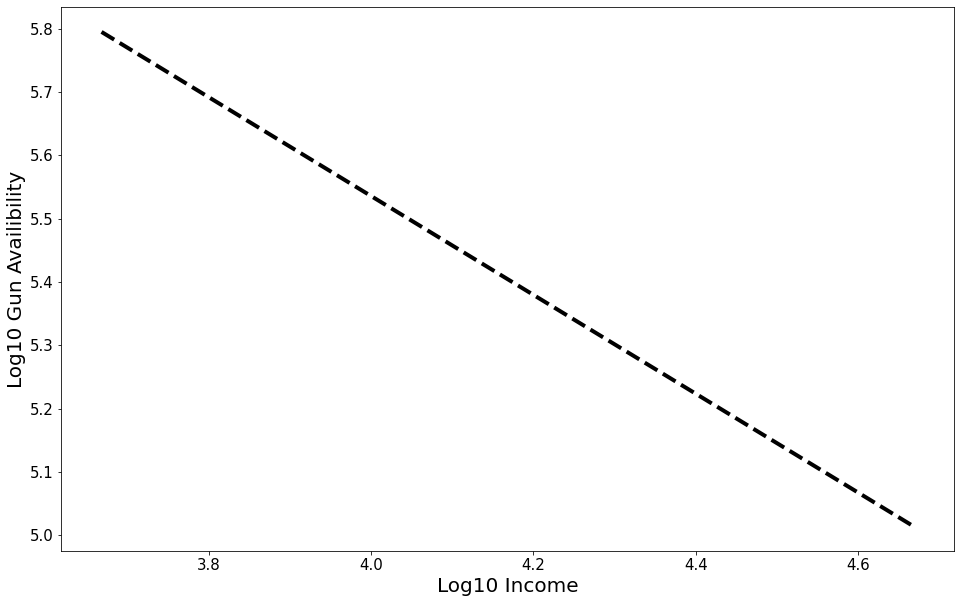

In [9]:

GI = pd.DataFrame.merge(rw, inc, how = 'outer')
# Replace Data from Rhode Island that got lost in the merge
GI['RW'] = GI['RW'].replace(np.nan, 4655) 
#print(GI)

#### Remove States with more than 275k registered weapons for more accurate findings
GI = GI.drop(GI.index[[0,1,2,3]])
#print(X)
GI = GI[GI['RW'] < 275000]

GI['Income10'] = np.log10(GI['Income'])
GI['RW10'] = np.log10(GI.RW)
gi_inc10 = GI['Income10']
gi_rw10 = GI['RW10']

outcome0, predictors0 = dmatrices('gi_rw10 ~ gi_inc10')
mod0 = sm.OLS(outcome0, predictors0)
res0 = mod0.fit()

# Summary of Stats
x0 = np.arange(gi_rw10.min(), gi_rw10.max())
y0 = (res0.params[1] * x0) + res0.params[0]

GI_corr = np.corrcoef(gi_inc10, gi_rw10)

# Model (Relative Change)
plt.plot(x0, y0, '--k', linewidth = 4, label = 'Model')
plt.ylabel('Log10 Gun Availibility', size =20)
plt.xlabel('Log10 Income',size =20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig_GC = plt.gcf()
fig_GC.set_size_inches(16,10)
print(res0.summary())

#Model Equation (Relative Change)
# Registered Weapons = log10(8.6558) + ( -0.78 * log10(income) )



In [10]:
GI_corr

array([[ 1.        , -0.11849381],
       [-0.11849381,  1.        ]])

* correlation = -0.12, suggesting a slight negative correlation

#### Conclusion
* We accept our null hypothesis, there is not a significant correlation between income and registered weapons

# Gun Availibility vs Crime Rate
* Null Hypothesis = No Significant Correlation 
* Alternative Hypothesis = Yes Significant Correlation

In [11]:

GC = pd.DataFrame.merge(rw, cr, how = 'outer')

# Replace Data from Rhode Island that got lost in the merge
GC['RW'] = GC['RW'].replace(np.nan, 4655)
crime = GC['CrimeRate'] 
GC


,State,RW,CrimeRate
0,Texas,725368.0,2778.07
1,Florida,432581.0,2666.74
2,California,376666.0,2827.81
3,Virginia,356963.0,1865.73
4,Pennsylvania,271427.0,1795.95
5,Georgia,225993.0,2900.27
6,Arizona,204817.0,3151.75
7,North Carolina,181209.0,2871.72
8,Ohio,175819.0,2457.08
9,Alabama,168265.0,3336.81


In [12]:
GC_corr = np.corrcoef(GC.RW, crime)

GA1 = np.log10(GC.RW)


outcome1, predictors1 = dmatrices('GA1 ~ crime')
mod1 = sm.OLS(outcome1, predictors1)
res1 = mod1.fit()

x2 = np.arange(crime.min(), crime.max())
y2 = (res1.params[1] * x2) + res1.params[0]

# Summary of Stats
print(res1.summary())

# Summary Interpretation To Predict RW from Crime Rate
# Model Equation
#Registered Weapons = log10(4.5544) + [0.0001 * crime]


                            OLS Regression Results                            
Dep. Variable:                    GA1   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.831
Date:                Thu, 11 Jun 2020   Prob (F-statistic):              0.182
Time:                        02:00:11   Log-Likelihood:                -31.572
No. Observations:                  50   AIC:                             67.14
Df Residuals:                      48   BIC:                             70.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5544      0.246     18.539      0.0

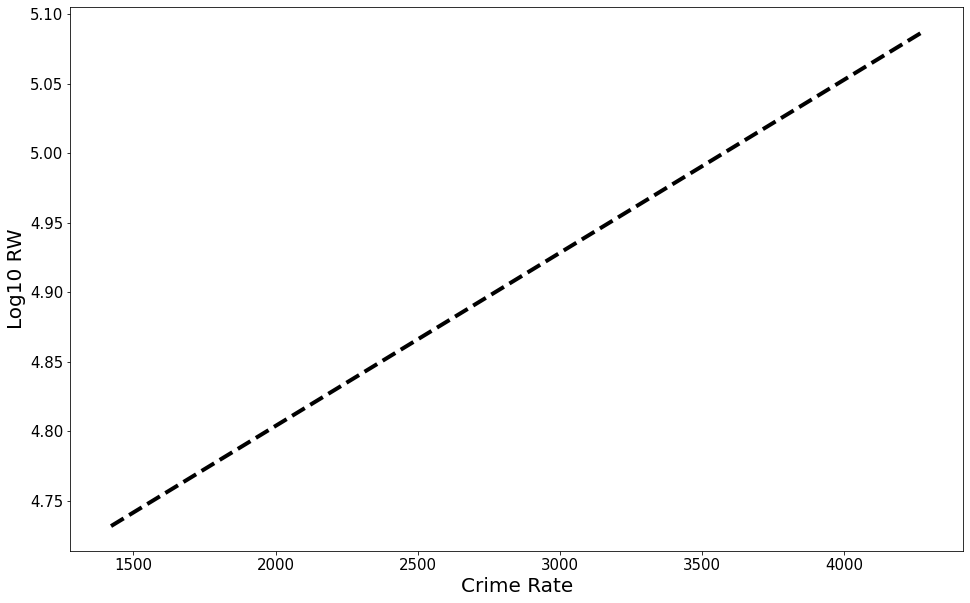

In [13]:
#Model(Relative Change)
plt.plot(x2, y2, '--k', linewidth = 4, label = 'Model')
plt.xlabel('Crime Rate', size =20)
plt.ylabel('Log10 RW', size = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig_GC = plt.gcf()
fig_GC.set_size_inches(16,10)

#### The graph implies that there is a positive correlation between crime rate (x-axis) and the logarithmic number of register weapons (y-axis). However, since we used the logarithmic scale, it shows how many times or what percentage the number of register weapons changed. 






In [14]:
GC_corr

array([[1.        , 0.10455028],
       [0.10455028, 1.        ]])

* Even though the graph suggests a positive correlation, the r-value is too weak to suggest a positve correlation, since r = 0.1 

#### Conclusion
* We accept our null hypothesis, there is no signficant correlation between Crime Rate and Gun Availibility

# Gun Availibility vs Population

* Null Hypothesis: No Significant Correlation
* Alternative Hypothesis: Significant Correlation

In [15]:
RW_pop = pd.DataFrame.merge(rw, pop)
RW_pop


,State,RW,Population
0,Texas,725368.0,28995881.0
1,Florida,432581.0,21477737.0
2,California,376666.0,39512223.0
3,Virginia,356963.0,8535519.0
4,Pennsylvania,271427.0,12801989.0
5,Georgia,225993.0,10617423.0
6,Arizona,204817.0,7278717.0
7,North Carolina,181209.0,10488084.0
8,Ohio,175819.0,11689100.0
9,Alabama,168265.0,4903185.0


                            OLS Regression Results                            
Dep. Variable:                  rw_10   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     85.36
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           3.16e-12
Time:                        02:00:11   Log-Likelihood:                -4.3615
No. Observations:                  50   AIC:                             12.72
Df Residuals:                      48   BIC:                             16.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4209      0.576     -0.731      0.4

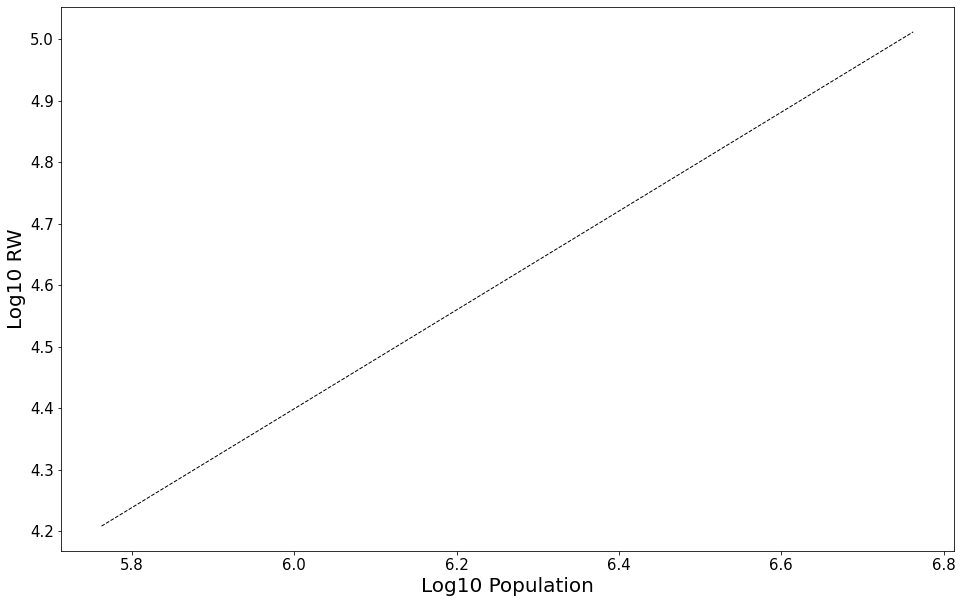

In [16]:
#print(pop)
#RW_pop.State.sort_values() 
newrow = {"State" : "Maine", "Population" : "1344212.0", "RW" : "17410.0"}
RW_pop = RW_pop.append(newrow, ignore_index = True) 
rw1 = RW_pop['RW'].astype(float)
pop1 = RW_pop['Population'].astype(float)
rw_10 = np.log10(rw1)
pop_10 = np.log10(pop1)
RW_pop_corr = np.corrcoef(rw_10, pop_10)


outcome2, predictors2 = dmatrices('rw_10 ~ pop_10')
mod2 = sm.OLS(outcome2, predictors2)
res2 = mod2.fit()

x3 = np.arange(pop_10.min(), pop_10.max())
y3 = (res2.params[1] * x3) + res2.params[0]
#Model 
plt.plot(x3, y3, '--k', linewidth = 1, label = 'Model')
plt.xlabel('Log10 Population', size= 20)
plt.ylabel('Log10 RW',size= 20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig_GC = plt.gcf()
fig_GC.set_size_inches(16,10)
## Summary of Stats
print(res2.summary())

### Model Equation (Relative Change)
# Registered Weapons = log10(-0.42) + ( 0.8034 * log10(pop_10) )


#### The graph implies that there is a positive correlation between the population and the number of registered weapons. Specifically, since the slope is 0.8034, it reveals that if the population increased by a factor of 1, then the number of registered weapons increased by a factor of 0.8034.


In [17]:
print(RW_pop_corr)

[[1.         0.80005236]
 [0.80005236 1.        ]]


* 0.80 correlation, suggesting a strong positive correlation

#### Conclusion:
* We Reject our null hypothesis in favor of the alternative
* There is a positive correlation between population and gun availibility
* This suggests bigger population = more registered weapons

# Crime Rate vs Income

* Null Hypothesis: No Correlation
* Alternative Hypothesis: Yes Correlation

                            OLS Regression Results                            
Dep. Variable:                    cr1   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.838
Date:                Thu, 11 Jun 2020   Prob (F-statistic):             0.0559
Time:                        02:00:11   Log-Likelihood:                -397.48
No. Observations:                  50   AIC:                             799.0
Df Residuals:                      48   BIC:                             802.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3890.8550    681.874      5.706      0.0

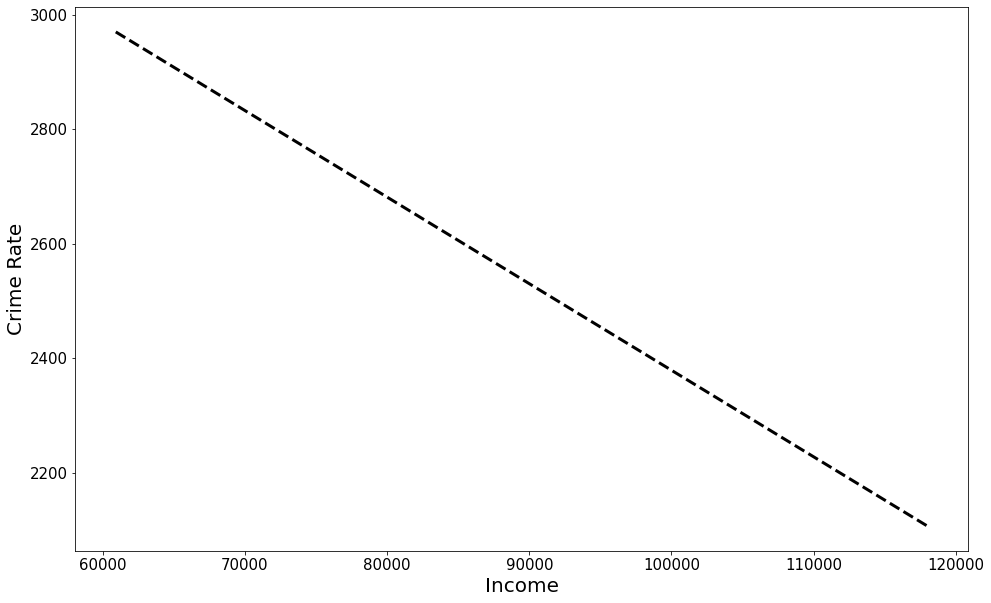

In [18]:

cr_inc = pd.DataFrame.merge(cr, inc)
cr1 = cr_inc['CrimeRate']
inc1 = cr_inc['Income']
cr_inc_corr = np.corrcoef(inc1, cr1)


outcome3, predictors3 = dmatrices('cr1 ~ inc1')
mod3 = sm.OLS(outcome3, predictors3)
res3 = mod3.fit()

x4 = np.arange(inc1.min(), inc1.max())
y4 = (res3.params[1] * x4) + res3.params[0]
#Model 
plt.plot(x4, y4, '--k', linewidth = 3, label = 'Model')
plt.xlabel('Income',size= 20)
plt.ylabel('Crime Rate', size= 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig_GC = plt.gcf()
fig_GC.set_size_inches(16,10)
# Summary of Stats
print(res3.summary())


# Model Equation
# CrimeRate = (3891) + (-0.0151 * Income)



#### The graph implies that there is a negative correlation between income and crime rate. Since it has a negative correlation, this shows that when income goes up, the crime rate goes down. When the income increased by a factor of 1, the crime rate decreased by a factor of 0.0151.


In [19]:
print(cr_inc_corr)

[[ 1.         -0.27208483]
 [-0.27208483  1.        ]]


* -0.265 correlation, suggesting a small negative correlation between income & crime rate

#### Conclusion:
* We Reject our null hypothesis, since r = -0.272, in favor of the alternative there is a reasonable negative correlation between Crime Rate and Income this suggests bigger income = lower crime rate

## Crime Rate vs Population

* Null Hypothesis: No Correlation
* Alternative Hypothesis: Yes Correlation

                            OLS Regression Results                            
Dep. Variable:                    cr2   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2404
Date:                Thu, 11 Jun 2020   Prob (F-statistic):              0.626
Time:                        02:00:11   Log-Likelihood:                -399.28
No. Observations:                  50   AIC:                             802.6
Df Residuals:                      48   BIC:                             806.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1815.3696   1540.934      1.178      0.2

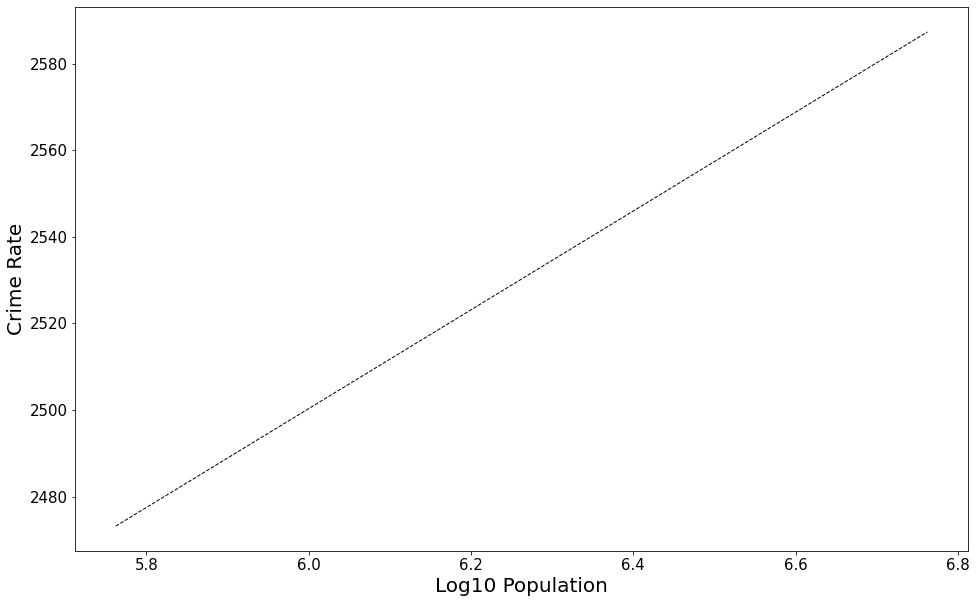

In [20]:


cr_pop = pd.DataFrame.merge(cr, pop)
#sns.distplot(cr_pop['Population'])
pop2 = np.log10(cr_pop['Population'])
#print(pop2)
cr2 = cr_pop['CrimeRate']
cr_pop_corr = np.corrcoef(pop2, cr2)



outcome4, predictors4 = dmatrices('cr2 ~ pop2')
mod4 = sm.OLS(outcome4, predictors4)
res4 = mod4.fit()

x5 = np.arange(pop2.min(), pop2.max())
y5 = (res4.params[1] * x5) + res4.params[0]
#Model 
plt.plot(x5, y5, '--k', linewidth = 1, label = 'Model')
plt.xlabel('Log10 Population', size = 20)
plt.ylabel('Crime Rate', size = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig_GC = plt.gcf()
fig_GC.set_size_inches(16,10)
# Summary of Stats
print(res4.summary())

#Model Equation (Relative Change)
# CrimeRate = 1815 + (114.15 * log10(population))



In [21]:
print(cr_pop_corr)

[[1.         0.07059479]
 [0.07059479 1.        ]]


* r = 0.07 Correlation, extremely weak, can conclude no correlation

#### Conclusion:
* We fail to reject our null hypothesis
* There is no significant correlation between crime rate and population

## Gun Law Strength vs Population

4826954.44 3205958.0 8274396.52 5822434.0


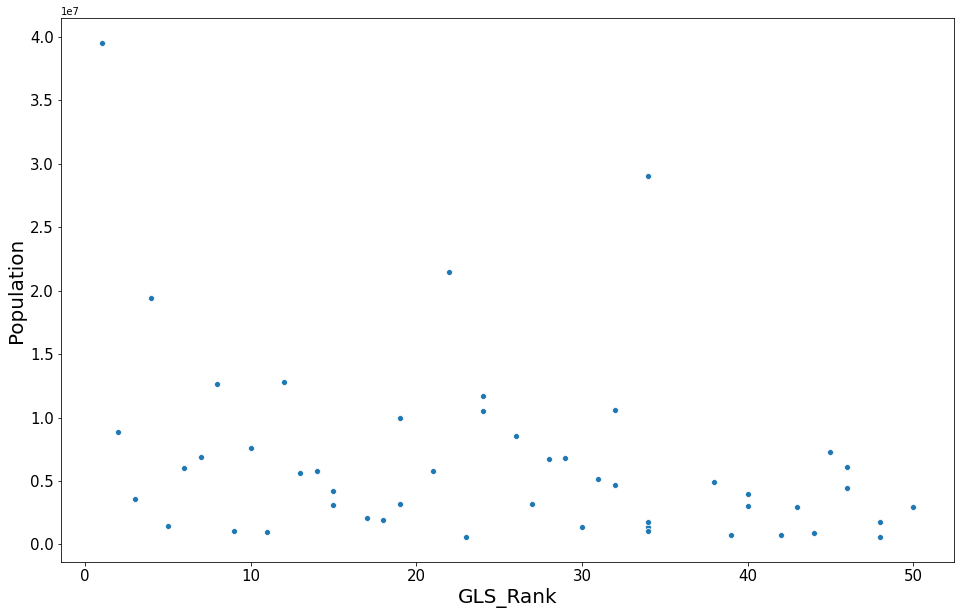

In [22]:
GLS_pop = pd.DataFrame.merge(pop, guns)
GLS_pop = GLS_pop.drop(['GDR_Rank', 'GDR100_Rank'], axis = 1)

pop3 = GLS_pop['Population']
GLS = GLS_pop['GLS_Rank']

sns.scatterplot(GLS, pop3)
plt.xlabel('GLS_Rank', size =20)
plt.ylabel('Population', size =20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Divide Up The Data into 2 categories, high GLS and low GLS
GLS_low = GLS_pop[GLS_pop['GLS_Rank'] > 25]
GLS_high = GLS_pop[GLS_pop['GLS_Rank'] <= 25]

fig_GC = plt.gcf()
fig_GC.set_size_inches(16,10)

# We will first see what the mean and median populations are of each group

GLS_low_meanpop = GLS_low['Population'].mean() # 4826954
GLS_low_medianpop = GLS_low['Population'].median() # 3205958

GLS_high_meanpop = GLS_high['Population'].mean() #8274396
GLS_high_medianpop = GLS_high['Population'].median() #5822434

print(GLS_low_meanpop,GLS_low_medianpop, GLS_high_meanpop,GLS_high_medianpop)

#### Conclusion:
* Based on the mean and median numbers, we can conclude that states with stricter Gun Laws have higher populations compared to states with less strict Gun Laws and vice versa

## Gun Law Strength vs Income

In [23]:
GLS_inc = pd.DataFrame.merge(inc, guns)
GLS_inc = GLS_inc.drop(['GDR_Rank', 'GDR100_Rank'], axis = 1)

# Divide Up The Data into 2 categories, high GLS1 and low GLS1
GLS1_low = GLS_inc[GLS_inc['GLS_Rank'] > 25]
GLS1_high = GLS_inc[GLS_inc['GLS_Rank'] <= 25]

# We will first see what the mean and median populations are of each group
GLS1_low_meaninc = GLS1_low['Income'].mean() # 81128
GLS1_low_medianinc = GLS1_low['Income'].median() # 80293

GLS1_high_meaninc = GLS1_high['Income'].mean() # 93733
GLS1_high_medianinc = GLS1_high['Income'].median() # 92008

print (GLS1_low_meaninc,GLS1_low_medianinc, GLS1_high_meaninc, GLS1_high_medianinc)


81128.41679999999 80293.39 93733.65399999998 92008.88


#### Conclusion:
* Based on the mean and median values, we can conclude that higher income states are associated with stricter gun laws and vice versa

## Gun Law Strength vs Political Stuff

In [24]:

GLS_pk = pd.DataFrame.merge(guns, pk)
GLS_pk = GLS_pk.drop(['GDR_Rank', 'GDR100_Rank'], axis = 1)

#First we will divide GLS_pk into high and low for GLS ranks
GLS_r_high = GLS_pk[GLS_pk['GLS_Rank'] <= 25]
GLS_r_low = GLS_pk[GLS_pk['GLS_Rank'] > 25]

#Next, we will calculation the "Democratic Advantage" average of both 
GLS_r_high_mean = GLS_r_high['Dem Advantage'].mean() # 12.04
GLS_r_low_mean = GLS_r_low['Dem Advantage'].mean() # -9.76

print (GLS_r_high_mean, GLS_r_low_mean)

12.04 -9.76


#### Conclusion: 
* Based on the means, we can conclude that there is a very large difference in Political Party Preference in states with primarily strict gun laws vs not strict gun laws
* States with stricter gun laws tend to be more Democratic
* States with less strict gun laws tend to be more Republican

## Gun Death Rate Rank vs Income

In [25]:

GDRR_inc = pd.DataFrame.merge(guns, inc)
GDRR_inc = GDRR_inc.drop(['GLS_Rank', 'GDR100_Rank'], axis = 1)

# Split into two groups, high gun death rate rank and low gun death rate rank
GDRR_inc['GDR_Rank'] = GDRR_inc['GDR_Rank'].astype(float)

GDRR_inc_low = GDRR_inc[GDRR_inc['GDR_Rank'] > 25]
GDRR_inc_high = GDRR_inc[GDRR_inc['GDR_Rank'] <= 25]

GDRR_inc_high_mean = GDRR_inc_high['Income'].mean() #79732
GDRR_inc_low_mean = GDRR_inc_low['Income'].mean() # 95130
GDRR_inc_high_median = GDRR_inc_high['Income'].median() # 79798
GDRR_inc_low_median = GDRR_inc_low['Income'].median() #93957
print (GDRR_inc_high_mean, GDRR_inc_low_mean,GDRR_inc_high_median,GDRR_inc_low_median)

79732.3064 95129.7644 79797.68 93957.11


#### Conclusion
* Based on our mean and median data, we can conclude there is a difference in income between states with higher gun death rate ranks than lower gun death rate ranks. States who have lower gun death rate ranks are associated with higher average incomes and vice versa

## Gun Death Rate Actual vs Income

* Null Hypothesis: No Correlation
* Alternative Hypothesis: Yes Correlation

                            OLS Regression Results                            
Dep. Variable:                 gdrank   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     56.48
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           1.20e-09
Time:                        02:00:12   Log-Likelihood:                -133.31
No. Observations:                  50   AIC:                             270.6
Df Residuals:                      48   BIC:                             274.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.0606      3.461     11.287      0.0

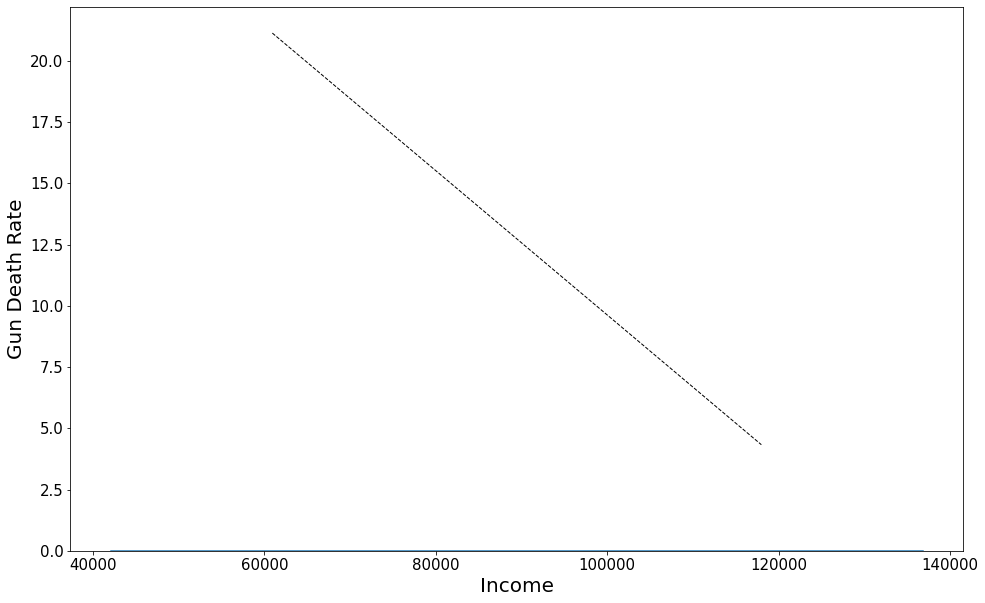

In [26]:


GDR_inc = pd.DataFrame.merge(guns, inc)
GDR_inc = GDR_inc.drop(['GLS_Rank', 'GDR_Rank'], axis = 1)
gdrank = GDR_inc['GDR100_Rank']
inc3 = GDR_inc['Income']
sns.distplot(inc3)

GDR_inc_corr = np.corrcoef(gdrank, inc3)



outcome5, predictors5 = dmatrices('gdrank ~ inc3')
mod5 = sm.OLS(outcome5, predictors5)
res5 = mod5.fit()

x6 = np.arange(inc3.min(), inc3.max())
y6 = (res5.params[1] * x6) + res5.params[0]

#Model 
plt.plot(x6, y6, '--k', linewidth = 1, label = 'Model')
plt.xlabel('Income', size =20)
plt.ylabel('Gun Death Rate', size =20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig_GC = plt.gcf()
fig_GC.set_size_inches(16,10)
# Summary of Stats
print(res5.summary())

#Model Equation
# Gun Death Rate = 39.06 + - (0.0003 * Income)



#### The graph implies that there is a **strong** negative correlation between income and gun death rate. For instance, when income increased from 60000 to 120000 (doubled), the gun death rate dropped dramatically from above 20.0 to below 5.0.



In [27]:
print(GDR_inc_corr)

[[ 1.         -0.73525331]
 [-0.73525331  1.        ]]


* -0.735 Correlation suggests a reasonably strong negative correlation between gun death rate and income

#### Conclusion:
* We fail to reject our null hypothesis, there is a significant negative correlation
* Between Gun Death Rate and Incomes. The higher the average income in a state, the lower the gun death rate

## Crime Rate vs Gun Law Strength Rank

In [28]:

CR_GLS = pd.DataFrame.merge(cr, guns)
CR_GLS = CR_GLS.drop(['GDR_Rank', 'GDR100_Rank'], axis = 1)
#print(CR_GLS)

# Divide into high and low Gun Law Safety Ranks
CR_GLS_high = CR_GLS[CR_GLS['GLS_Rank'] <= 25]
CR_GLS_low = CR_GLS[CR_GLS['GLS_Rank'] > 25]

# Find the mean and median Crime rates for each
CR_GLS_high_mean = CR_GLS_high['CrimeRate'].mean() #2432
CR_GLS_high_median = CR_GLS_high['CrimeRate'].median() #2364
CR_GLS_low_mean = CR_GLS_low['CrimeRate'].mean() #2707
CR_GLS_low_median = CR_GLS_low['CrimeRate'].median() #2778

print(CR_GLS_high_mean, CR_GLS_high_median, CR_GLS_low_mean, CR_GLS_low_median)


2431.7676 2364.63 2706.7136 2778.07


#### Conclusion
* From this we can conclude that there is a significant difference in the median and mean crime rates of states with strict vs less strict gun law strength ranks states with higher gun law strength ranks are associated with lower crime

## Gun Death Rate Rank vs Political Stuff

In [29]:
###################Gun Death Rate Rank vs Political Stuff############
GDRR_pk = pd.DataFrame.merge(guns, pk)
GDRR_pk = GDRR_pk.drop(['GLS_Rank', 'Dems %', 'Reps %', 'Political Lean'], axis = 1)

# We will group Gun Death Rate Ranks into high and low
GDRR_pk_low = GDRR_pk[GDRR_pk['GDR_Rank'] > 25]
GDRR_pk_high = GDRR_pk[GDRR_pk['GDR_Rank'] <= 25]

#We will then take the median and means of each's Democratic Advantage, our operational definition
#For a state's political party preference
GDRR_pk_high_mean = GDRR_pk_high['Dem Advantage'].mean() # -8.04
GDRR_pk_high_median = GDRR_pk_high['Dem Advantage'].median() # -7.0 
GDRR_pk_low_mean = GDRR_pk_low['Dem Advantage'].mean() # 10.32
GDRR_pk_low_median = GDRR_pk_low['Dem Advantage'].median() # 12.0
print(GDRR_pk_high_mean, GDRR_pk_low_mean, GDRR_pk_high_median, GDRR_pk_low_median)


-8.04 10.32 -7.0 12.0


#### Conclusion
* From the mean and medians of the democratic advantage of states with high and low
Gun Death Rate Ranks, we can conclude that Sstates with higher gun death rate ranks
tend to be more Republican and states ranking lower gun deaths tend to be
more Democratic

## Gun Death Rate Actual vs Political Stuff

In [30]:
#We will divide up the political parties by state into two Categories, Republican advantage and Democratic Advantage. 
#The State of Iowa will be included in both as its dem/republican advantage is neutral
GDR_pk = GDRR_pk

GDR_pk_D = GDR_pk[GDR_pk['Dem Advantage'] >= 0]
GDR_pk_R = GDR_pk[GDR_pk['Dem Advantage'] <= 0]

GDR_pk_D_mean = GDR_pk_D['GDR100_Rank'].mean()  #10.39
GDR_pk_D_median = GDR_pk_D['GDR100_Rank'].median() #10.78
GDR_pk_R_mean = GDR_pk_R['GDR100_Rank'].mean()  #16.43
GDR_pk_R_median = GDR_pk_R['GDR100_Rank'].median() #16.76

print(GDR_pk_D_mean, GDR_pk_D_median, GDR_pk_R_mean, GDR_pk_R_median)



10.391481481481481 10.78 16.4325 16.759999999999998


#### Conclusion
* From the mean and median gun death rate values, we can conclude that Republican States are associated with higher gun death rates than Democratic States

## Gun Death Rate Rank vs Population

In [31]:
GDRR_pop = pd.DataFrame.merge(guns, pop)
GDRR_pop = GDRR_pop.drop(['GLS_Rank'], axis = 1)

# We will divide Gun Death Rate Ranks into "high" and "low"
GDRR_pop_low = GDRR_pop[GDRR_pop['GDR_Rank'] > 25]
GDRR_pop_high = GDRR_pop[GDRR_pop['GDR_Rank'] <= 25]

# Next we will see the mean and median population values for each
GDRR_pop_low_mean = GDRR_pop_low['Population'].mean() #8589776
GDRR_pop_low_median = GDRR_pop_low['Population'].median() #5822434
GDRR_pop_high_mean = GDRR_pop_high['Population'].mean() #4511575
GDRR_pop_high_median = GDRR_pop_high['Population'].median() #3956971

print(GDRR_pop_low_mean, GDRR_pop_low_median, GDRR_pop_high_mean, GDRR_pop_high_median)



8589775.72 5822434.0 4511575.24 3956971.0


#### Conclusion
* From the mean and median of our population values, we can conclude that states with higher gun death rate ranks are associated with lower populations and states with lower gun death rate ranks are associated with higher populations

## Gun Death Rate Actual vs Population

In [32]:
GDR_pop = GDRR_pop

# Find the median population value so we can divide up the populations
# Into high and low populations
GDR_pop_testmedian = GDR_pop['Population'].median()

# Divide into high and low populations using the median value variable
GDR_pop_low = GDR_pop[GDR_pop['Population'] < GDR_pop_testmedian]
GDR_pop_high = GDR_pop[GDR_pop['Population'] > GDR_pop_testmedian]

# Compare Median and Mean Gun Death Rate Actual Values
GDR_pop_low_mean = GDR_pop_low['GDR100_Rank'].mean() #13.88
GDR_pop_low_median = GDR_pop_low['GDR100_Rank'].median() #13.5
GDR_pop_high_mean = GDR_pop_high['GDR100_Rank'].mean() #12.77
GDR_pop_high_median = GDR_pop_high['GDR100_Rank'].median() #12.81
                                   
print(GDR_pop_low_mean, GDR_pop_low_median, GDR_pop_high_mean, GDR_pop_high_median)



13.883199999999999 13.5 12.77 12.81


* From the mean and median of our gun death rate values, we can conclude that states with lower populations are associated with slightly higher gun death rates and states with higher populations are associated with slightly lower gun death rates

## Gun Availibility vs Political Data

In [33]:


RW_pk = pd.DataFrame.merge(rw, pk)
RW_pk = RW_pk.drop(['Dems %', 'Reps %', 'Political Lean'], axis = 1)

newrow1 = {"State" : "Rhode Island", "RW" : 4655.0, "Dem Advantage" : 21.0 }
RW_pk = RW_pk.append(newrow1, ignore_index = True) # Add back in lost data from Rhode Island

# Split Up Dem Advantage column into two groups Republican and Democratic
# Neutral Iowa in Both

RW_pk_D = RW_pk[RW_pk['Dem Advantage'] <= 0.0]
RW_pk_R = RW_pk[RW_pk['Dem Advantage'] >= 0.0]

# Now we will see mean and median number of registered weapons from each group

RW_pk_D_mean = RW_pk_D['RW'].mean() #113101
RW_pk_D_median = RW_pk_D['RW'].median() #90855
RW_pk_R_mean = RW_pk_R['RW'].mean() #122956
RW_pk_R_median = RW_pk_R['RW'].median() #90217

print(RW_pk_D_mean, RW_pk_D_median, RW_pk_R_mean, RW_pk_R_median)



113100.91666666667 90855.0 122955.92592592593 90217.0


#### Conclusion
* From the mean and median values, we can conclude that there is no significant Difference in Gun Availibility in states that are primarily democratic versus states that are primarily Republican

# Gun Availibilty vs Number of Gun Deaths

* Null Hypthothesis: No Correlation
* Alternative Hypothesis: Some Correlation

In [34]:
to_merge= rw.sort_values(by=['State'])
RW_numOfDeaths= to_merge
RW_numOfDeaths['GunDeaths'] = fire_death["DEATHS"]
#RW_numOfDeaths

In [35]:
#log 10 transformation
RW_numOfDeaths["GunDeaths10"] = np.log10(fire_death["DEATHS"])
RW_numOfDeaths["RW10"] = np.log10(to_merge['RW'])
RW_numOfDeaths

,State,RW,GunDeaths,GunDeaths10,RW10
9,Alabama,168265.0,1680.0,3.225309,5.225994
44,Alaska,20520.0,82.0,1.913814,4.312177
6,Arizona,204817.0,186.0,2.269513,5.311366
18,Arkansas,108801.0,159.0,2.201397,5.036633
2,California,376666.0,1147.0,3.059563,5.575956
17,Colorado,112691.0,991.0,2.996074,5.051889
31,Connecticut,74877.0,821.0,2.914343,4.874348
49,Delaware,5281.0,124.0,2.093422,3.722716
1,Florida,432581.0,155.0,2.190332,5.636067
5,Georgia,225993.0,889.0,2.948902,5.354095


In [36]:
RW_numOfDeaths.corrwith(RW_numOfDeaths["RW10"])

RW             0.794921
GunDeaths      0.120039
GunDeaths10    0.136189
RW10           1.000000
dtype: float64

In [37]:
outcome, predictors = dmatrices('RW ~ GunDeaths', RW_numOfDeaths)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     RW   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4360
Date:                Thu, 11 Jun 2020   Prob (F-statistic):              0.512
Time:                        02:00:12   Log-Likelihood:                -644.90
No. Observations:                  49   AIC:                             1294.
Df Residuals:                      47   BIC:                             1298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.094e+05   2.68e+04      4.082      0.0

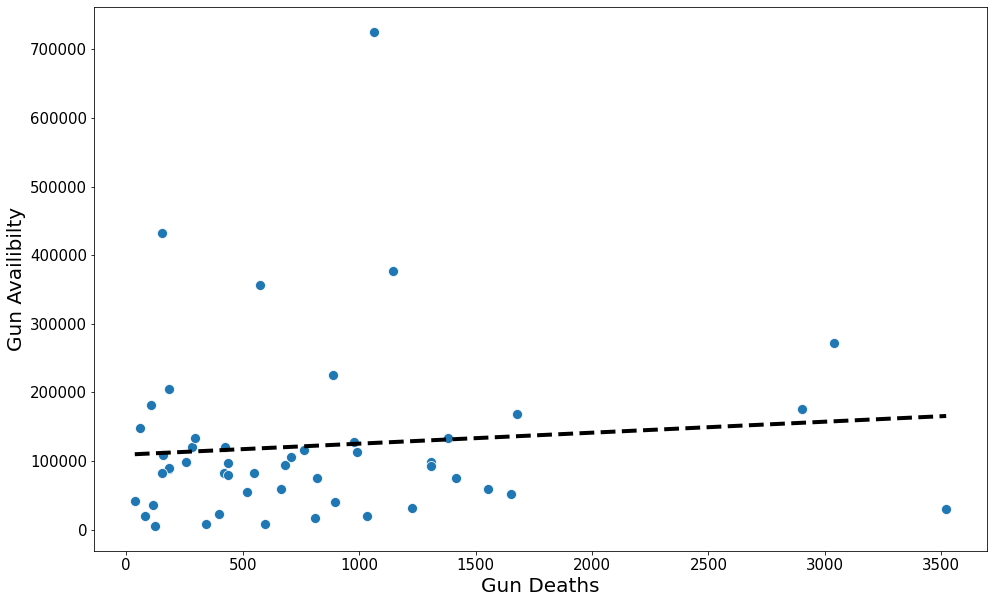

In [38]:
sns.scatterplot(x='GunDeaths', y= 'RW', data=RW_numOfDeaths, s=100)
plt.xlabel('Gun Deaths', size = 20)
plt.ylabel('Gun Availibilty', size = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

xs = np.arange(RW_numOfDeaths['GunDeaths'].min(), RW_numOfDeaths['GunDeaths'].max())
ys = (res.params[1] * xs) + res.params[0]
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
fig_df2_2 = plt.gcf()
fig_df2_2.set_size_inches(16,10)

#### The scatter plot is skewed left. This means that gun deaths in most states are below the mean. More importantly, we can see that in most states, the number of registered weapons are below 200000. This shows that there is no correlation between gun deaths and gun availability, since some states have more gun deaths while the number of registered weapons stays the same. 


In [39]:
RW_numOfDeaths.corr()

,RW,GunDeaths,GunDeaths10,RW10
RW,1.000000,0.095869,0.111971,0.794921
GunDeaths,0.095869,1.000000,0.849576,0.120039
GunDeaths10,0.111971,0.849576,1.000000,0.136189
RW10,0.794921,0.120039,0.136189,1.000000


#### Conclusion
* We can conclude that there is almost no correlation between Gun Availabilty (Number of registered weapons) and Number of Gun deaths.
We will accept the null hypothesis

## Gun Availability vs Gun Law Strength Rank 

* Null Hypthothesis: No Correlation
* Alternative Hypothesis: Some Correlation

In [40]:
guns_GLS = guns
guns_GLS['RW'] = rw["RW"]
#dropping Gun Death Rate columns since we do not need those
guns_GLS= guns_GLS.drop(columns= ['GDR_Rank','GDR100_Rank'])
guns_GLS = guns_GLS.replace(np.nan,19720.0 )
#log10 transformation
guns_GLS['RW10'] = np.log10(guns_GLS["RW"])
guns_GLS

,GLS_Rank,State,RW,RW10
0,38.0,Alabama,725368.0,5.860558
1,42.0,Alaska,432581.0,5.636067
2,45.0,Arizona,376666.0,5.575956
3,40.0,Arkansas,356963.0,5.552623
4,1.0,California,271427.0,5.433653
5,14.0,Colorado,225993.0,5.354095
6,3.0,Connecticut,204817.0,5.311366
7,11.0,Delaware,181209.0,5.258180
8,22.0,Florida,175819.0,5.245066
9,32.0,Georgia,168265.0,5.225994


In [41]:
outcome, predictors = dmatrices('RW ~ GLS_Rank'  , guns_GLS)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     RW   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8022
Date:                Thu, 11 Jun 2020   Prob (F-statistic):              0.375
Time:                        02:00:13   Log-Likelihood:                -657.70
No. Observations:                  50   AIC:                             1319.
Df Residuals:                      48   BIC:                             1323.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.172e+04   3.66e+04      2.506      0.0

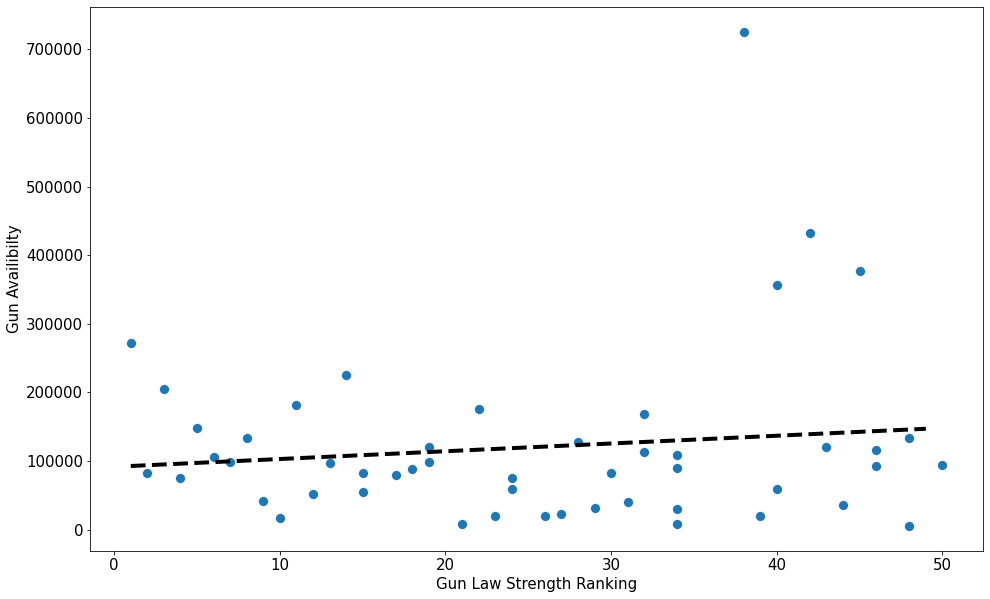

In [42]:
guns_GLS = guns_GLS.sort_values(by='GLS_Rank')
sns.scatterplot(x='GLS_Rank', y= 'RW', data=guns_GLS, s=100)

plt.xlabel('Gun Law Strength Ranking', size = 15)
plt.ylabel('Gun Availibilty', size = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

xs = np.arange(guns_GLS['GLS_Rank'].min(), guns_GLS['GLS_Rank'].max())
ys = (res.params[1] * xs) + res.params[0]
plt.plot(xs, ys, '--k', linewidth=4, label='Model')


fig_df2_2 = plt.gcf()
fig_df2_2.set_size_inches(16,10)
fig_df3 = plt.gcf()
fig_df3.set_size_inches(16,10)

#### The scatter plot implies that there is a very slight positive correlation between gun law strength rank and gun availability.

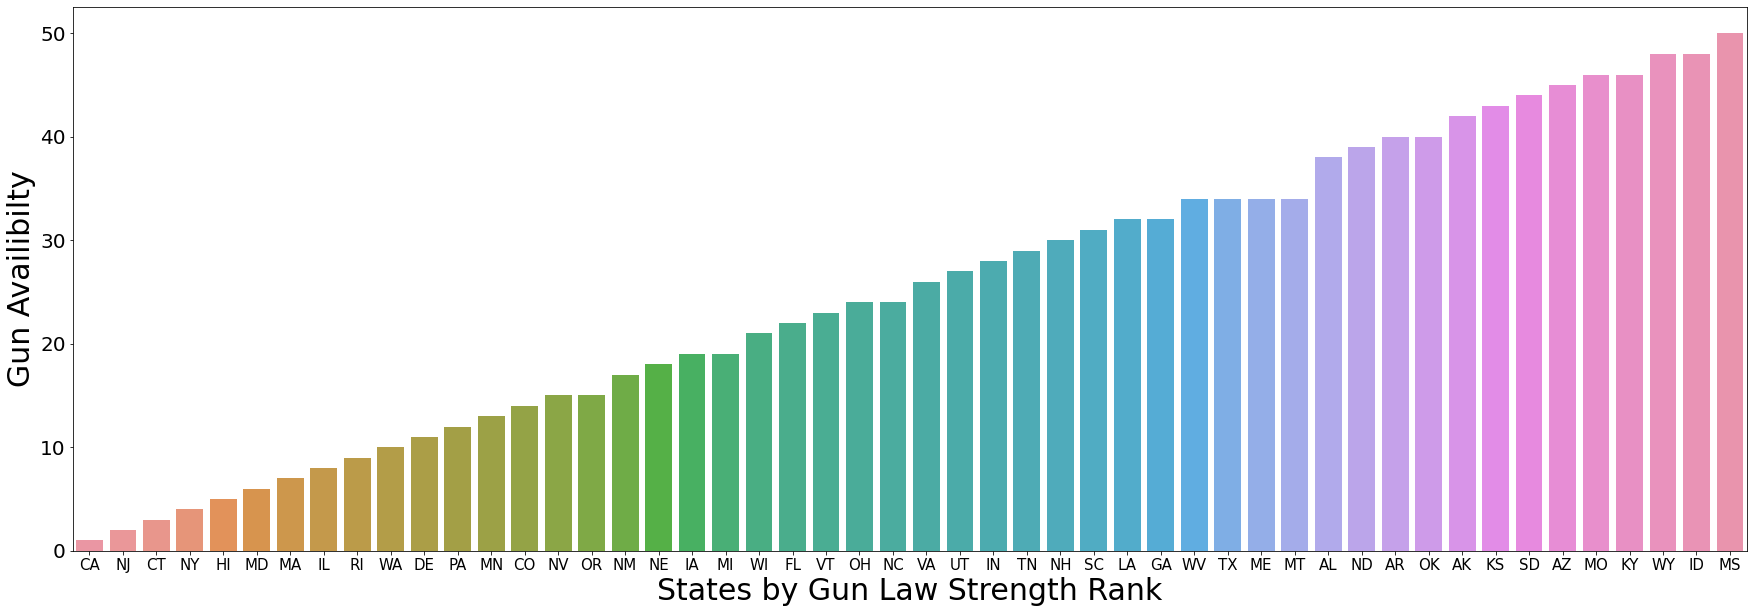

In [43]:
guns_GLS["state abv"] = fire_death["STATE"]
guns_GLS = guns_GLS.sort_values(by='GLS_Rank')


sns.barplot(x='state abv', y= 'GLS_Rank', data=guns_GLS)
plt.xlabel('States by Gun Law Strength Rank', size = 30)
plt.ylabel('Gun Availibilty', size = 30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)


fig_df5 = plt.gcf()
fig_df5.set_size_inches(30,10)


#### NOTE: States are arranged by the ranking of gun law strength, from 1st to 50th (with California (CA) have the strongest gun laws, while Mississppi (MS) having the weakest laws).

In [44]:
guns_GLS.corr()

,GLS_Rank,RW,RW10
GLS_Rank,1.000000,0.128211,-0.056374
RW,0.128211,1.000000,0.796902
RW10,-0.056374,0.796902,1.000000


#### Conclusion
* Although the r-pearson value is low for correlation when Gun Law Strength vs Number of weapons, the bar graph suggests that the stronger the gun laws of the state, the less guns there are. Therefore, we will accept the Altenative Hypothesis 

## Crime Rate vs Gun Death Rate


* Null Hypthothesis: No Correlation
* Alternative Hypothesis: Strong Correlation

In [45]:
cr_merge = cr.sort_values(by=["State"])
cr_guns = pd.merge(cr_merge,guns)
cr_guns = cr_guns.drop(columns = ["RW", "GLS_Rank"])

#log10 tranformation
cr_guns

,State,CrimeRate,GDR_Rank,GDR100_Rank
0,Alabama,3336.81,2.0,21.70
1,Alaska,4185.44,7.0,20.74
2,Arizona,3151.75,18.0,15.29
3,Arkansas,3456.64,8.0,18.96
4,California,2827.81,44.0,7.45
5,Colorado,3068.83,19.0,15.14
6,Connecticut,1888.39,45.0,4.91
7,Delaware,2748.01,34.0,11.55
8,Florida,2666.74,27.0,12.81
9,Georgia,2900.27,17.0,15.72


In [46]:
outcome, predictors = dmatrices('GDR100_Rank ~ CrimeRate', cr_guns)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            GDR100_Rank   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     21.32
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           2.93e-05
Time:                        02:00:14   Log-Likelihood:                -143.57
No. Observations:                  50   AIC:                             291.1
Df Residuals:                      48   BIC:                             295.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0595      2.307      1.326      0.1

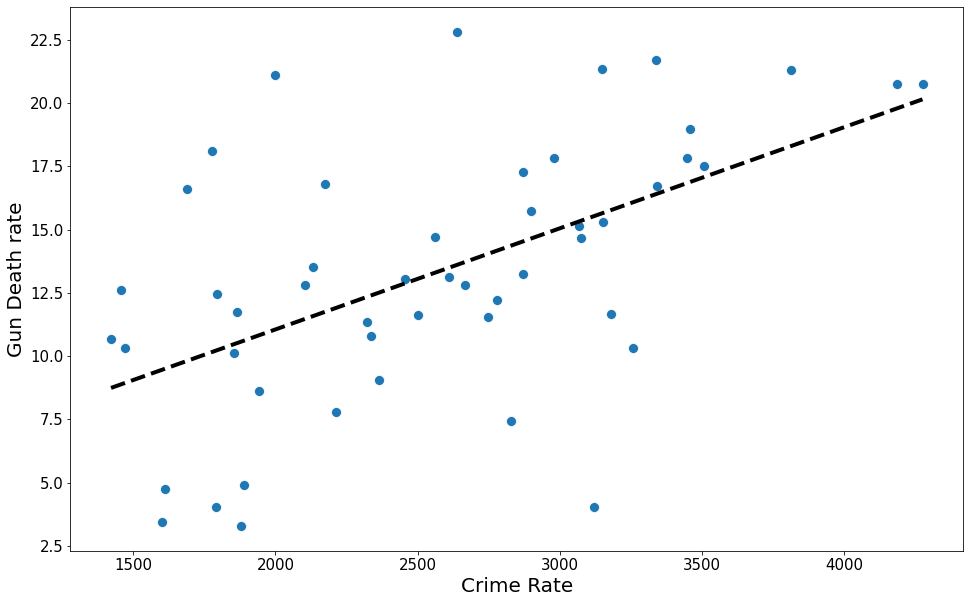

In [47]:
sns.scatterplot(x='CrimeRate', y= 'GDR100_Rank', data=cr_guns, s=100)
plt.xlabel('Crime Rate',size = 20)
plt.ylabel('Gun Death rate',size = 20)

xs = np.arange(cr_guns['CrimeRate'].min(), cr_guns['CrimeRate'].max())
ys = (res.params[1] * xs) + res.params[0]
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig_df4 = plt.gcf()
fig_df4.set_size_inches(16,10)

#### The scatter plot implies that there is a positive correlation between crime rate and gun death rate. The more crime rate a state has, the  more gun deaths it gains. 


In [48]:
cr_guns.corr()

,CrimeRate,GDR_Rank,GDR100_Rank
CrimeRate,1.000000,-0.556039,0.554591
GDR_Rank,-0.556039,1.000000,-0.983082
GDR100_Rank,0.554591,-0.983082,1.000000


#### Conclusion
* There is a moderate positive correlation between Crime Rate and the Gun Death Rate where r= 0.554591

## Gun Death Rank vs Gun Law Strength

* Null Hypthothesis: No Correlation
* Alternative Hypothesis: Some Correlation

In [49]:
GDR_GLS = guns.drop(columns=["RW",'GDR100_Rank'])
GDR_GLS

,GLS_Rank,State,GDR_Rank
0,38.0,Alabama,2.0
1,42.0,Alaska,7.0
2,45.0,Arizona,18.0
3,40.0,Arkansas,8.0
4,1.0,California,44.0
5,14.0,Colorado,19.0
6,3.0,Connecticut,45.0
7,11.0,Delaware,34.0
8,22.0,Florida,27.0
9,32.0,Georgia,17.0


In [50]:
outcome, predictors = dmatrices('GLS_Rank ~ GDR_Rank', GDR_GLS)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               GLS_Rank   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     54.94
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           1.72e-09
Time:                        02:00:14   Log-Likelihood:                -184.81
No. Observations:                  50   AIC:                             373.6
Df Residuals:                      48   BIC:                             377.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.6735      2.858     15.283      0.0

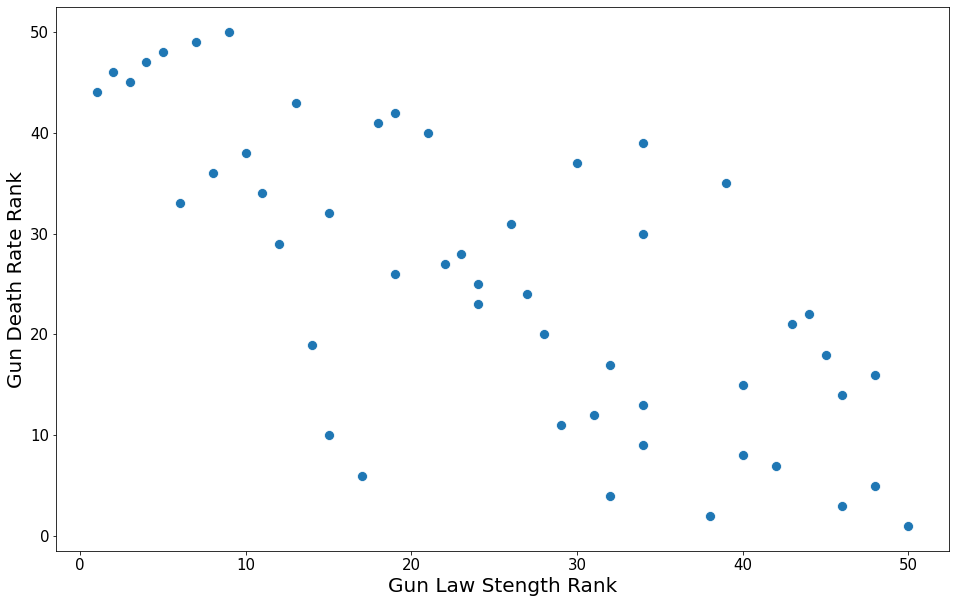

In [51]:
sns.scatterplot(x='GLS_Rank', y= 'GDR_Rank', data=GDR_GLS, s=100)
plt.ylabel('Gun Death Rate Rank', size = 20)
plt.xlabel('Gun Law Stength Rank', size = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig_df5 = plt.gcf()
fig_df5.set_size_inches(16,10)

#### The scatter plot implies that there is a negative correlation between the ranking of gun death rate and the ranking of gun law strength. It shows that states with low gun deaths tend to have stricter gun laws. 


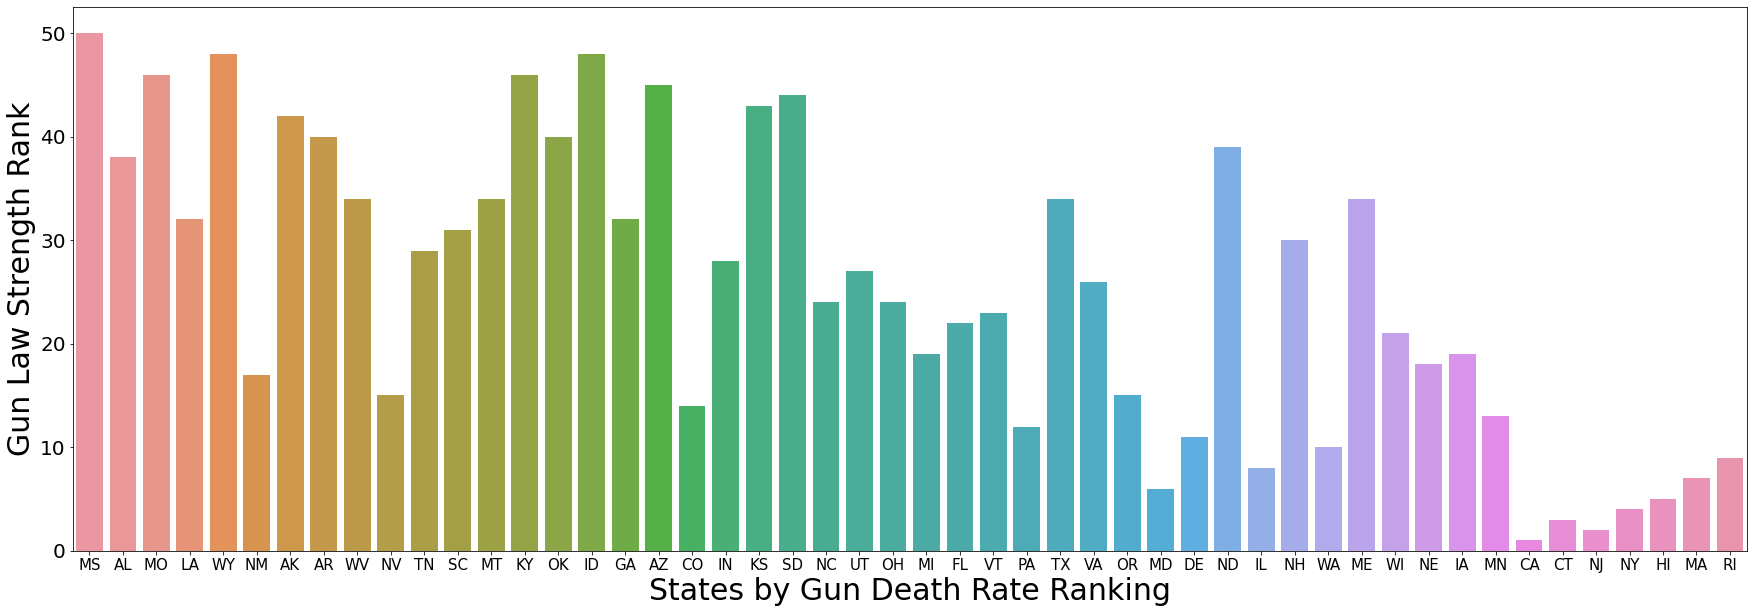

In [52]:
GDR_GLS["state abv"] = fire_death["STATE"]
GDR_GLS = GDR_GLS.sort_values(by='GDR_Rank')



GDR_GLS['GDR_Rank'] =GDR_GLS['GDR_Rank'].astype(int)
GDR_GLS['GLS_Rank'] =GDR_GLS['GLS_Rank'].astype(int)
sns.barplot(x='state abv', y= 'GLS_Rank', data=GDR_GLS)
plt.ylabel('Gun Law Strength Rank', size = 30)
plt.xlabel('States by Gun Death Rate Ranking', size = 30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)


fig_df5 = plt.gcf()
fig_df5.set_size_inches(30,10)

#### NOTE: On the x-axis, the Gun Death Rank goes from 1-50, from left to right 
##### (e.g Mississippi(MS) is rank 1 went it comes to Gun Deaths, while Rhode Island(RI) is rank 50, meaning that they have the least amount of gun deaths out of any state)

#### A bar graph for better visualization

In [53]:
GDR_GLS.corr()

,GLS_Rank,GDR_Rank
GLS_Rank,1.000000,-0.730547
GDR_Rank,-0.730547,1.000000


#### Conclusion
* Here we can conclude that there is a strong negative correlation between the Gun Death Rate and the Gun Law Strength, which means the higher the ranking of the gun law strength (1st being the highest and 50th being the lowest), the lower the ranking of Gun Deaths per state since r = -0.730547

# Ethics & Privacy

Potential privacy & ethics related issues for our ideal dataset include the unintended consequences of misuse, biases, equitable analysis, and transparency. The first question that arises is if we will have permission to use the dataset for our class project. This largely depends on what specific dataset we are using for our analysis but generally under creative commons license we will be allowed non-commercial use. However, we’ll pay close attention to the permissions allowed for each dataset we are including for our analysis. In regards to privacy if there are individual’s names or any identifying information we will make sure to exclude this information during data cleaning as to protect the privacy of those individuals. We believe the primary issues we will have is regarding biases and equitable analysis. Naturally, the individuals, groups, or companies compiling datasets have their own goals and thus will include their own procedures of collecting data. These procedures will come with their own biases and thus may affect our results. To mitigate this we will exclude data from our datasets which may skew our results. In addition, we will merge data from other datasets that may include certain populations that will give a more accurate representation of our ideal representative sample therefore allowing us to conduct a more equitable analysis. Lastly, through our final report we will cite where we gathered our datasets and describe our modification to the datasets to increase transparency.

# Conclusion & Discussion

<p> Our group from the beginning of this project was interested in the gun violence issue in America. Our main motivation was to use data to figure out why some areas have more gun violence than others. Although this is an important question with a potentially insightful outcome we found out that this was beyond the scope of our project because there are many variables influencing the outcome of gun violence. The insights we gathered from our stats tests would have been insufficient to answer this question. We began to narrow down our question so we could accurately gain some insightful conclusions that were within the scope of our project. Distilling the question down to finding the correlation between gun-availability and gun-violence per area (State) while seeing the effects of gun regulation laws on this correlation, is a specific targeted goal that we wanted our data to answer. With this we began to carry out stats tests and models particularly Linear Regression.</p> 
<p>In carrying out our analysis, we began to realize that there were other variables that could influence the results of our tests. For instance, political affiliations are a factor we didn’t address in our question but are influential in determining gun regulation laws. Red states are linked with relaxed gun regulations and blue states are linked with stricter gun regulations. From this insight we decided to run our stats tests and models on these secondary variables in order to be aware of potential confounding variables. This has also given us insight into some variables that had little to no effect on gun violence that we have thought would have a correlation. For the results of our analysis, there were mixed outcomes but all were ultimately suggesting that gun-availability isn’t correlated with gun-violence beyond statistical significance. In this instance, we have failed to reject the null with the model only explaining 5% of the variance. However, the data does support the claim that gun regulations laws negatively correlate with gun-violence such that states with stronger laws have seen lower rates of gun violence (deaths) (Correlation = 0.74, R-squared = 0.534).</p> 

<p>Due to the scope of our project our limitations were apparent in the aspect of actually determining a variable, other than gun regulations, that influenced gun violence with statistical significance. This can be due to several factors such as the overall accuracy of the data we collected as well as gun availability only calculating registered weapons (doesn’t count illegal weapons). While in our secondary stats tests we have seen some correlation between income and gun violence it is beyond the limits of our project to suggest that income is a descriptor of gun-violence in an area because income in itself is an outcome of a multitude of factors such as education. However, this would be a great starting off point to continue the scope of this project. Analyzing the effects education has on gun violence in a given area would be an interesting segue. This can even be specified to gun safety education. 
</p> 

<p>In terms of social impact, our project can be used to observe and can prompt questions as to why gun-availability isn’t an accurate measure of gun-violence according to the presented data. It can inspire additional research which can institute policies that would significantly reduce gun violence especially in regards to targeted policies that can be used in specific states, counties, or communities that greatly need them. 
</p>

# Team Contributions

- Cesar Guajardo: Wrote the proposal, created 4 stats sets
- Zijian Bi: Organized and structured the Jyputer notebook, graphs optimization, data cells cleanup, fixed compiler errors
- Bruke Tamrat:  Proposal, Hypothesis, Ethics & Privacy, description for some stats tests, Conclusion & Discussion 
- Trent Domanski: Found datasets, cleaned datasets, created the statistical tests, coded statistical sets, wrote some written analysis for the data finding/cleaning/exploring processes